# **Customer Churn Classifier | EDA & ML(Logistic Regression & SVM & KNN)**  

<img height=400 width=600 src="https://miro.medium.com/v2/resize:fit:1024/0*vz_yu4mZ6Y69XSZg.png" />

# **Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        dataset = os.path.join(dirname, filename)
        print(dataset)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

datasets\customer_churn_dataset-testing-master.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

# **Preprocessing & EDA**

In [ ]:
df =pd.read_csv("datasets\customer_churn_dataset-testing-master.csv")
df 
churn_csv = 'out.csv'
df.to_csv(churn_csv, index=False)

In [4]:
df.info(dataset)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df.isnull().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

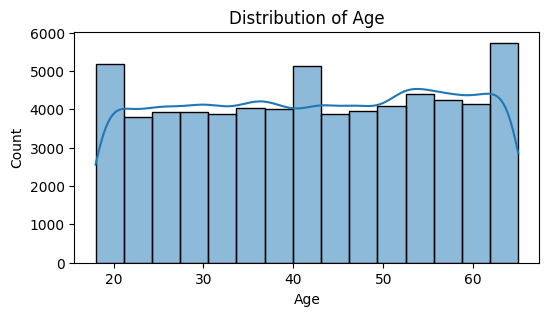

In [8]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

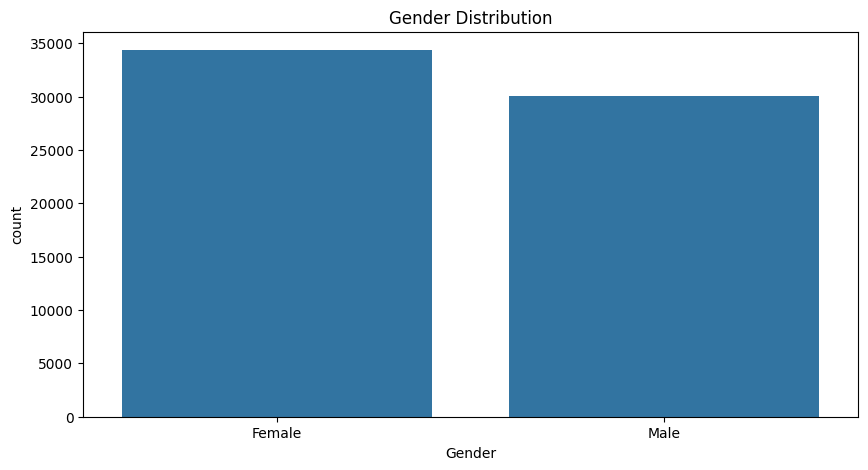

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

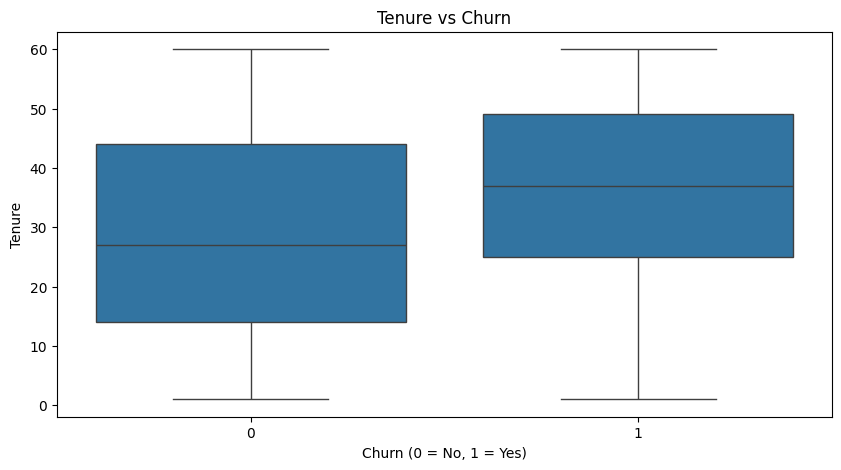

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

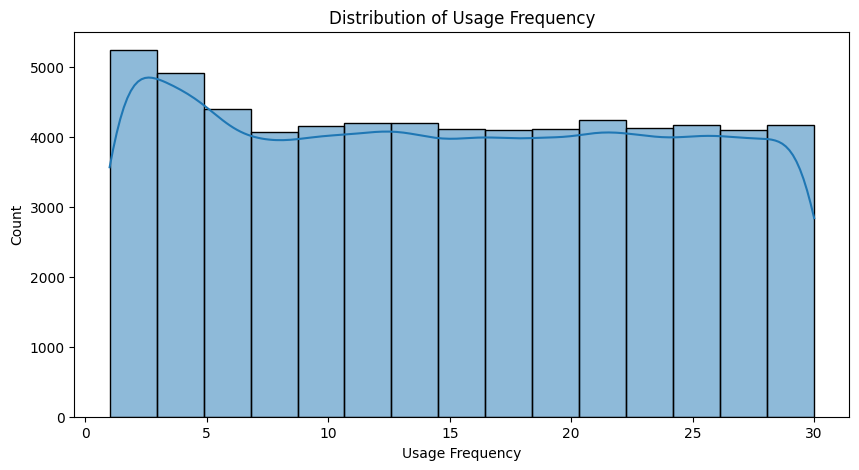

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Usage Frequency'], bins=15, kde=True)
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.show()

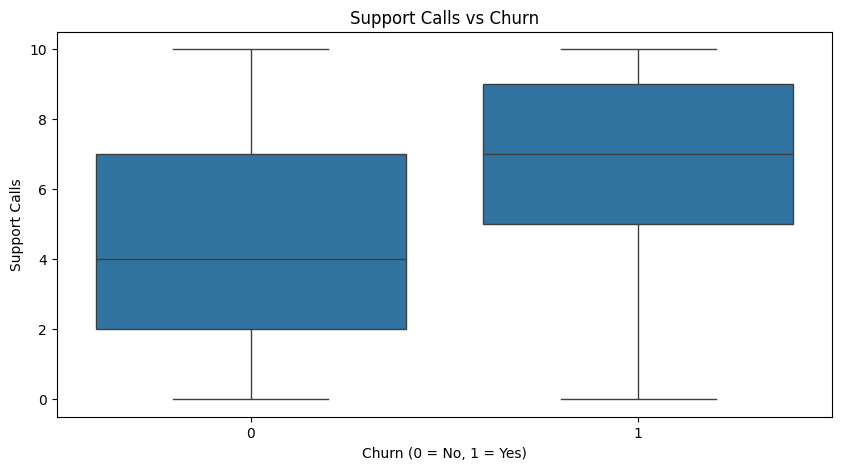

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()


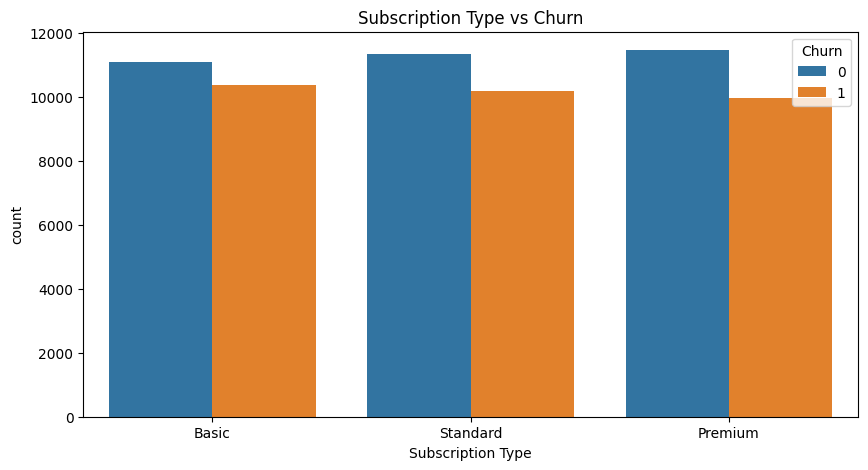

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn')
plt.show()

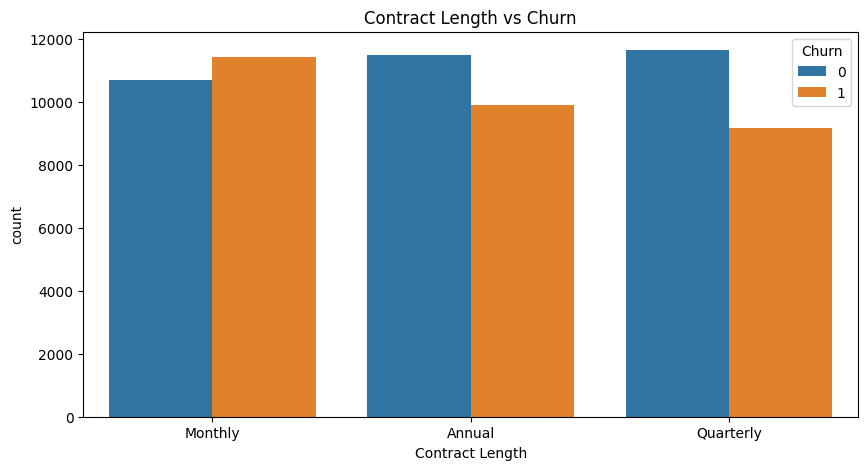

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title('Contract Length vs Churn')
plt.show()


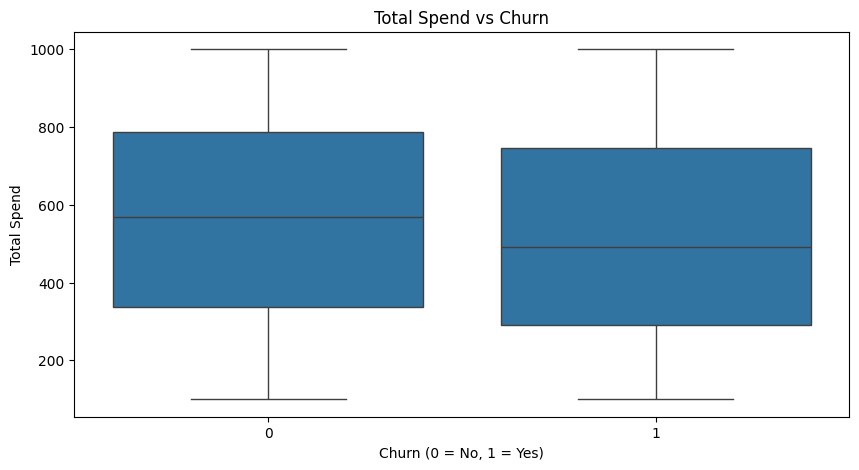

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [17]:
df["Contract Length"].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [18]:
gender_map = {'Male': 0, 'Female': 1}
subscription_map = {'Basic': 0, 'Premium': 1, 'Pro': 2}
Contract_Length = {'Annual': 0, 'Quarterly': 1, 'Monthly' : 2}

df['Gender'] = df['Gender'].map(gender_map)
df['Subscription Type'] = df['Subscription Type'].map(subscription_map)
df['Contract Length'] = df['Contract Length'].map(Contract_Length)


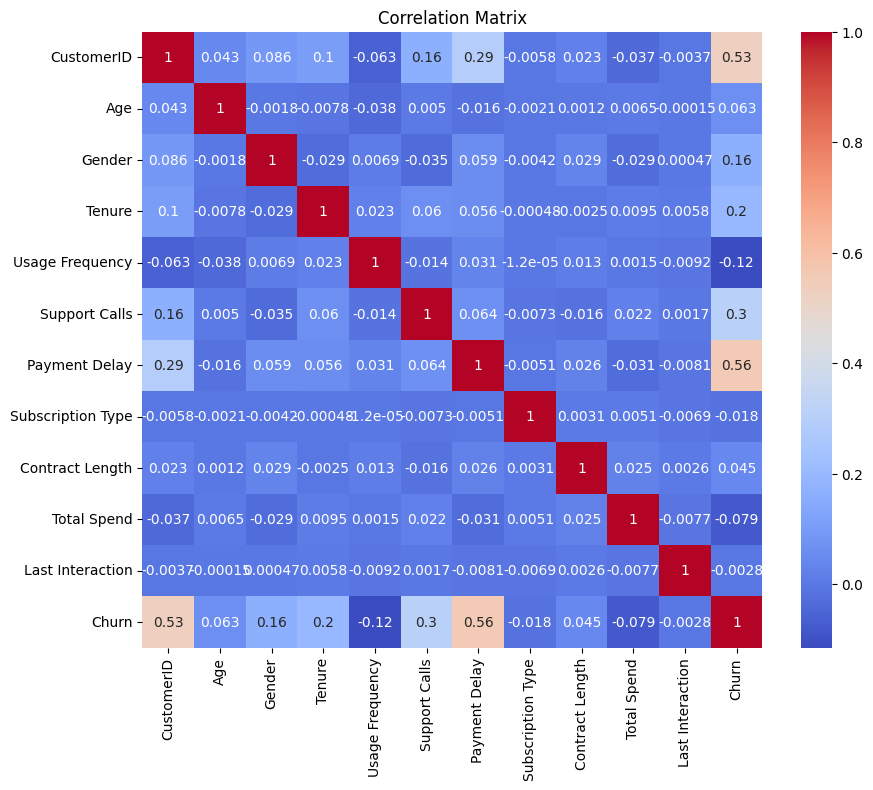

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
threshold = 0.03

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Churn"]) > threshold].tolist()
high_corr_features.remove("Churn")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["Churn"]

['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Contract Length', 'Total Spend']


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size= 0.2 , shuffle=True, random_state=55)

In [22]:
X_train.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
Usage Frequency    0
Support Calls      0
Payment Delay      0
Contract Length    0
Total Spend        0
dtype: int64

In [23]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
Y_train = Y_train.dropna(axis=0)
Y_test = Y_test.dropna(axis=0)


In [24]:
X_train.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
Usage Frequency    0
Support Calls      0
Payment Delay      0
Contract Length    0
Total Spend        0
dtype: int64

# **Logistic Regression**

In [25]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
Y_pred = model.predict(X_test)


In [27]:
print(accuracy_score(Y_test, Y_pred))


0.8154563106796117


# **SVM Model**

In [28]:
model2 = SVC()
model2.fit(X_train, Y_train)

SVC()

In [29]:
Y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))

0.8044271844660195


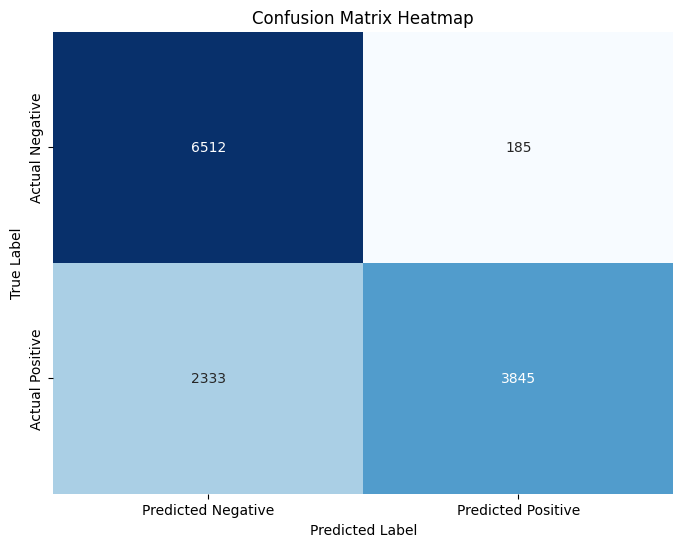

In [30]:
conf_matrix2 =confusion_matrix(Y_test, Y_pred2)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# **KNN Model**

In [31]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [32]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred_knn = knn.predict(X_test)

In [34]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.20%


In [35]:
print("Classification Report:")
print(classification_report(Y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.79      6697
           1       0.81      0.69      0.74      6178

    accuracy                           0.77     12875
   macro avg       0.78      0.77      0.77     12875
weighted avg       0.78      0.77      0.77     12875



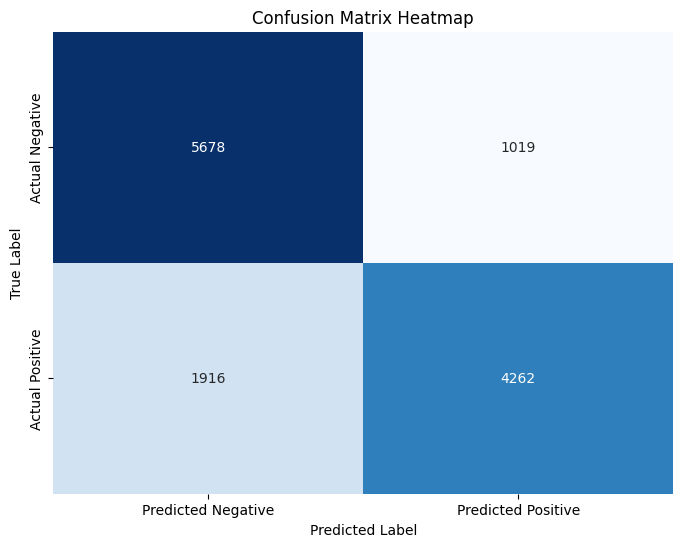

In [36]:
conf_matrix3 =confusion_matrix(Y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()